# 1. 데이터

통계분석은 데이터를 다루는 것으로부터 시작하고 그 데이터에서 의미를 찾는 것입니다.

다음은 학생번호와 성적에 대한 데이터를 임의로 만들었습니다.

In [14]:
import random
import pandas as pd

# 학생 데이터 생성
def generate_student_data(num_students):
    student_data = []
    for i in range(1, num_students+1):
        student_number = f'{i:03}'  # 학생번호 생성 (예: 001, 002, ...)
        grade = random.randint(1, 3)  # 학년 랜덤 생성 (1~3 중 선택)
        english_score = random.randint(60, 100)  # 영어 점수 랜덤 생성 (60~100 사이)
        korean_score = random.randint(60, 100)  # 국어 점수 랜덤 생성 (60~100 사이)
        math_score = random.randint(60, 100)  # 수학 점수 랜덤 생성 (60~100 사이)
        total_score = english_score + korean_score + math_score  # 전체 성적 계산

        student_data.append([
            student_number,
            grade,
            english_score,
            korean_score,
            math_score,
            total_score
        ])

    # 전체 성적에 따라 순위 매기기
    student_data = sorted(student_data, key=lambda x: x[5], reverse=True)
    for i, student in enumerate(student_data):
        student.append(i + 1)

    return student_data

# 10명의 학생 데이터 생성
students = generate_student_data(10)

# 데이터프레임 생성
df = pd.DataFrame(students, columns=['학생번호', '학년', '영어', '국어', '수학', '전체성적', '전체성적순위'])

# 생성된 데이터프레임 출력
print(df)

  학생번호  학년  영어  국어   수학  전체성적  전체성적순위
0  007   1  92  81   94   267       1
1  010   2  88  83   81   252       2
2  003   1  88  73   86   247       3
3  002   2  92  90   62   244       4
4  001   1  73  96   70   239       5
5  009   2  75  63  100   238       6
6  004   2  66  71   93   230       7
7  005   3  84  71   74   229       8
8  008   1  86  80   63   229       9
9  006   1  72  68   72   212      10


우리가 앞으로 볼 데이터 형식은 다음과 같이 데이터프레임형식이 대부분일 것이고, 이를 통해 데이터 분석을 시작할 확률이 높습니다.

In [15]:
# 영어 성적에 대해 출력

df['영어']

0    92
1    88
2    88
3    92
4    73
5    75
6    66
7    84
8    86
9    72
Name: 영어, dtype: int64

In [16]:
# DataFrame은 2차원 Series는 1차원의 데이터 구조입니다.
# 가끔 데이터 구조로 인해 분석시 오류가 나는 경우가 있는데 이러한 데이터 구조를 잘 파악해야합니다.

## 1.1 데이터의 크기

우리는 데이터를 처음 받을 때 데이터의 크기를 짐작해봐야합니다. 데이터의 크기를 살펴보지 않고 무턱대고 실행시키거나 분석을 들어가면 다음과 같은 오류에 빠질 수 있습니다.

* 데이터의 크기가 커서 컴퓨터나 시스템 다운
* 분석을 처음했을때와 마지막 했을때의 데이터의 수가 다름
* 내가 필요한 변수나 자료가 없는 상태로 분석 진행

이러한 것을 방지하기 위해 우리는 처음에 데이터 크기를 살펴보는 연습을 해야합니다.

In [17]:
# 데이터의 크기 shape
df.shape

(10, 7)

일반적으로 shape는 두가지 수를 출력하며, 첫번째는 데이터에 대한 수이고, 두번째는 변수에 대한 수입니다. 즉 10개의 데이터와 7개의 변수가 있다는 것을 알 수 있습니다.

##1.2 데이터 중심 지표

데이터의 특징을 파악하는데는 두가지 방법이 있습니다.
* 하나는 평균과 분산등의 수치 지표에 따라 데이터를 요약하는 방법
* 하나는 그림을 그려 시각화 하는 방법

우리는 이미 앞서 pandas와 numpy를 배웠지만 통계분석시 어떤식으로 데이터를 바라봐야할지 복습하는 마음으로 살펴봅시다.

In [18]:
import numpy as np
import pandas as pd

In [19]:
# 우리는 head를 통해 상위 5개의 자료가 어떻게 구성되었는지를 볼 수 있습니다.
df.head()

,학생번호,학년,영어,국어,수학,전체성적,전체성적순위
0,007,1,92,81,94,267,1
1,010,2,88,83,81,252,2
2,003,1,88,73,86,247,3
3,002,2,92,90,62,244,4
4,001,1,73,96,70,239,5


In [20]:
#array를 사용하면 조금 더 빠른 수학연산들을 할 수 있습니다.
scores = np.array(df['영어'])[:10]
scores

array([92, 88, 88, 92, 73, 75, 66, 84, 86, 72])

In [21]:
#이를 데이터 프레임으로 따로 구성하고 싶으면 다음과 같이 변경할 수도 있습니다.
scores_df = pd.DataFrame({'score' : scores},
                         index=pd.Index(df.index, name = 'student_num'))

In [22]:
scores_df

,score
student_num,
0,92
1,88
2,88
3,92
4,73
5,75
6,66
7,84
8,86


### 1.2.1 평균값

데이터를 하나의 값으로 요약한 지표이며, 대표값으로 불립니다. 평균값의 경우 데이터의 전반적인 중간값을 알 수 있는 척도이지만 분산 이나 그래프가 없이 평균만 보고 판단할 경우 상당한 데이터적 오류에 빠질 수 있으니 주의해야합니다.

[예시] 시험점수
* 평균 시험점수가 90점 -> 시험이 쉬웠음
* 평균 시험점수가 30점 -> 시험이 어려웠음

그러나 그 중에서도 100점을 맞은 친구들이 있고, 그 중에서도 0점을 맞은 친구가 있기 때문에 그래프와 같이 확인하는것이 좋습니다.

In [23]:
# 평균의 계산
# 평균은 전체 데이터의 합 / 전체 데이터의 갯수로 나눈 값

sum(scores) / len(scores)

81.6

In [24]:
# numpy 함수로도 계산이 가능

np.mean(scores)

81.6

In [25]:
# pandas로도 평균은 산출 가능

scores_df.mean()

score    81.6
dtype: float64

![image.png](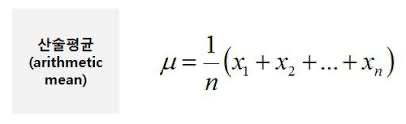
)

###1.2.2 중앙값

중앙값은 median이라고 불리며, 크기 순서대로 나열할때 정확하게 중앙에 위치한 값입니다. 예를 들어 1,2,3,4,5라는 데이터가 있으면 3이 중앙값이 됩니다.

중앙값은 이상치에 영향을 덜받는 특징이 있습니다.
[1,2,3,4,5,1000] 이라는 데이터가 있는 경우
평균과 중앙값의 차이는 어마어마하게 나게 됩니다.

중앙값은 꼭 데이터안에 있는 수를 표현하지 않아도 됩니다.
예를 들어 [1,2,3,4,5,6]이라는 데이터가 있는 경우 중앙값은 3.5입니다.

In [26]:
scores

array([92, 88, 88, 92, 73, 75, 66, 84, 86, 72])

In [27]:
# 중앙값 계산
# 데이터의 개수가 홀수면 (n+1)/2 번째 데이터가 중앙값
# 데이터의 개수가 짝수면 n/2번째 데이터와 n/2+1번째 데이터의 평균이 중앙값

sorted_scores = np.sort(scores)
sorted_scores

array([66, 72, 73, 75, 84, 86, 88, 88, 92, 92])

In [28]:
# 중앙값의 정의대로 코드를 작성하면 다음과 같이 됩니다.
# 주의점 : 파이썬은 0부터 시작하기 때문에 - 1을 해야합니다.
n = len(sorted_scores)
if n % 2 == 0:
  m0 = sorted_scores[n//2 - 1]
  m1 = sorted_scores[n//2]
  median = (m0 + m1) / 2
else:
  median = sorted_scores[(n+1)//2 - 1]

print(median)

85.0


In [29]:
# 정의에 대해 배웠으니 함수를 통해서도 산출해봅시다.

np.median(scores)

85.0

In [30]:
scores_df.median()

score    85.0
dtype: float64

## 1.2.3 최빈값

최빈값은 데이터에서 가장 많이 나타나는 값입니다.
최빈값을 사용하면 데이터가 중간값이 많은지 극단값이 많은지 Null값이나 특이값이 많은지를 파악할 수 있습니다.

In [31]:
# 최빈값 산출
# 1~ 100 평균값이 300? 중앙값 50
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [32]:
[-99999999, 999999999, 888888888, ########, $$$$$$$$, Null, *, 특수문자]

# 최빈값 -> 한 데이터가 몇%를 차지하고 있는지
# 1,2,3,4,5라는 데이터가 1% -> 99999999 99%

# Quantile

SyntaxError: ignored

In [ ]:
# 최빈값 산출

pd.Series([1,2,3,4,5]).mode()

In [34]:
# 최빈값을 산출하는 다른 방법

from scipy. stats import mode
a=[1,2,2,3,4,5]
mode(a)

<ipython-input-34-17b1b53c8572>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(a)


ModeResult(mode=array([2]), count=array([2]))

## 1.3 데이터의 산포도 지표

평균값이나 중앙값으로 데이터를 대표하는 값을 얻고 어떻게 해석해야하는지를 알아봤습니다.

그러나 평균값을 얘기할때 평균값에 주의하라는 말씀을 드렸는데요 분산은 이를 상쇄할 수 있는 지표입니다.

만약 학급의 절반이 0점 절반이 100점을 맞았으면 평균은 50점이 되지만 평균만 보고서는 이 학급이 어떻게 구성되어있는지는 모를것입니다.

우리는 산포도 지표들을 통해 데이터를 면밀히 살펴봐야합니다.

### 1.3.1 편차

산포도를 구하는 대표적인 방법은 편차(deviation)을 알아보는 것입니다. 편차는 각 데이터가 평균으로 부터 어느 정도 떨어져 있는지를 파악하는 척도입니다. 예를 들어 A학생의 점수가 50점이고 학생의 평균점수가 60점이라면 A학생의 편차는 -10점이 됩니다.

In [35]:
#학생들의 성적 평균구하기
mean = np.mean(scores)
print(mean)
#편차구하기
deviation = scores - mean
deviation

81.6


array([ 10.4,   6.4,   6.4,  10.4,  -8.6,  -6.6, -15.6,   2.4,   4.4,
        -9.6])

편차가 10개도 한번에 파악하기가 쉽지 않은데 데이터가 더 많아지면 쉽지 않습니다. 그러면 편차에 대한 값을 정리하려면 어떻게 해야할까요?

일단 편차를 평균 옆에다가 둡니다. 아까 만들었던 scores_df DataFrame을 가져오겠습니다.

In [ ]:
scores_df

In [37]:
# 편차를 데이터 프레임에 추가하기

summary_df = scores_df.copy()   # DataFrame의 copy는 원본을 건들이지 않음
summary_df['deviation'] = deviation
summary_df

# 소수점을 제한하는 함수 #편차의 합은 0
%precision 3
pd.set_option('float_format', '{:.2f}'.format)

summary_df.mean()

score       81.60
deviation    0.00
dtype: float64

In [38]:
summary_df.mean()

score       81.60
deviation    0.00
dtype: float64

In [39]:
# 소수점을 제한하는 함수
%precision 3
pd.set_option('float_format', '{:.2f}'.format)

In [40]:
summary_df.mean()

score       81.60
deviation    0.00
dtype: float64

### 1.3.2 분산

다음과 같이 각 데이터와 평균 간 차이를 나타내는 편차를 이용하는 것은 바람직한 방법이긴하지만 편차의 평균이 0이 되면 추가적인 분석을 하기에는 애매합니다.

그래서 편차에 제곱을 하게 된다면 그 척도를 사용할 수 있게 됩니다.

In [ ]:
# 분산 계산 - 1

np.mean(deviation ** 2)

In [42]:
np.var(scores)

77.64

In [43]:
# pandas에도 분산을 구하는 방법은 있지만 pandas의 분산은 불편 추정량에 의한 분산입니다.
scores_df.var()

score   86.27
dtype: float64

In [44]:
# pandas에도 분산을 구하는 방법은 있지만 pandas의 분산은 불편 추정량에 의한 분산입니다.
scores_df.var(ddof = 0)

score   77.64
dtype: float64

In [45]:
# summary_df에 편차 제곱을 추가

summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student_num,,,
0,92,10.40,108.16
1,88,6.40,40.96
2,88,6.40,40.96
3,92,10.40,108.16
4,73,-8.60,73.96
5,75,-6.60,43.56
6,66,-15.60,243.36
7,84,2.40,5.76
8,86,4.40,19.36


In [46]:
# 분산 산출

summary_df.mean()

score                 81.60
deviation              0.00
square of deviation   77.64
dtype: float64

### 1.3.3 표준편차

평균의 단위는 원래 데이터의 단위를 따라가게 됩니다.
위의 자료에서는 80.8점이 평균이다라고 말할수 있지만
분산은 그럴수가 없습니다. 제곱을 했기 때문입니다. 영어점수의 분산이 93.16의 제곱이다 라고 말하는것도 웃기는 상황입니다.

그래서 원래의 단위와 통일하기 위해 표준편차라는 개념을 도입하였고, 그것은 분산에 루트를 씌워 제곱을 상쇄시킨 개념입니다.

In [47]:
np.sqrt(np.var(scores, ddof =0))

8.811356308764276

In [48]:
np.std(scores, ddof = 0 )

8.811356308764276

np.sqrt, var를 이용하거나 np.std를 활용해서 계산할 수 있습니다.


###1.3.4 범위

범위는 분산이나 표준편차와 달리, 데이터 전체를 보는 것이 아니라 데이터의 최댓값과 최솟값만으로 산포도를 표현하는 방법입니다. 최댓값과 최솟값의 차이가 크면 산포도가 크고, 그 차이가 작으면 산포도가 작다는 의미로도 해석할 수 있습니다.

두가지의 값으로만 계산된 값이므로, 대략적인 자료에 파악에 유용하지만 평균과 동일하게 주의해야합니다.

In [ ]:
# 범위 = max 값에서 min값

np.max(scores) - np.min(scores)

35

범위에는 4분위 범위라는것도 있습니다. 큰 이상값이 하나라도 있으면 범위나 평균같은 수치들은 엄청난 변화가 있을 수 있습니다. 그래서 사분위 범위를 참고하면 데이터를 보는데 도움이 됩니다.

최근에는 4분위 값 뿐만아니라 99% 95% 90% , 1% 5% 10%에 해당하는 값들을 같이 봐서 데이터의 전체적인 파악을 하고, 하나의 값이 얼마나 있는지 고루 분포되어있는지를 파악하게 됩니다.

이러한 특이점이 있는 데이터들은 그래프로도 식별하기 쉽지 않을수 있기 때문에 4분위수를 구하는것은 여러모로 도움이 됩니다.

In [ ]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

26.5

IQR을 사용할때 Q2를 사용하지는 않지만 IQR = Q2라고 생각하시면 됩니다. 분산은 평균에 대해 정의되는 산포도라고 한다면 IQR은 중앙값에 대해 정의되는 산포도 지표라고 해석할 수 있습니다.

Q1, Q2, Q3은 상자그림으로도 그려볼수 있습니다.

### 1.3.5 한번에 데이터 보기

desctibe 라는 함수를 사용하면 모든 데이터의 개요를 볼 수 있습니다. 다음과 같이 데이터를 간단히 바라보고 세부적으로 분석하는것도 방법이라고 생각합니다.

In [ ]:
pd.Series(scores).describe()

count   10.00
mean    80.70
std     14.35
min     64.00
25%     67.25
50%     79.00
75%     93.75
max     99.00
dtype: float64

## 1.4 데이터의 정규화

평균과 분산에 의존하지 않고 데이터를 파악한다면 데이터의 더 상대적인 위치를 알 수 있을 것입니다.

수능같은 예시를 들때 불수능이다. 이러면 1등급 컷이 70~80점대 일때도 있고, 물수능이다. 이러면 99점도 2등급일 수 있는데, 절대적인 수치로만 봤을때는 이해가 안되지만 상대적인 수치에 대한 비교를 했을때 다음과 같은 사례가 이해가 될것입니다.

### 1.4.1 표준화

통계학에서는 데이터에서 평균을 빼고 표준편차로 나누는 작업을 표준화(standardization)라고 합니다.

그러면 우리가 계속 다뤄봤던 데이터를 표준화 해봅시다.

In [ ]:
stand_data = (scores - np.mean(scores)) / np.std(scores)
stand_data

array([ 0.683,  1.345,  1.051,  0.242,  1.345, -0.492, -1.08 , -0.713,
       -1.154, -1.227])

표준화된 데이터는 평균이 0 표준편차가 1로 됩니다.

In [ ]:
rounded_mean = np.around(np.mean(stand_data), decimals=2)
rounded_mean

-0.0

In [ ]:
np.std(stand_data, ddof= 0)

1.0

주의! 주의점은 데이터와 동일한 표준편차로 나눗셈을 했기 때문에 표준화된 데이터는 원래 데이터의 단위를 사용할 수 없다 라는 것을 기억해야합니다.

#2. 1차원 데이터의 시각화

이제 더 많은 학생들의 데이터를 살펴볼 것이고, 시각화를 통해 데이터를 어떻게 바라봐야하는지 알아보겠습니다.

In [ ]:
import random
import pandas as pd

# 학생 데이터 생성
def generate_student_data(num_students):
    student_data = []
    for i in range(1, num_students+1):
        student_number = f'{i:03}'  # 학생번호 생성 (예: 001, 002, ...)
        grade = random.randint(1, 3)  # 학년 랜덤 생성 (1~3 중 선택)
        english_score = random.randint(60, 100)  # 영어 점수 랜덤 생성 (60~100 사이)
        korean_score = random.randint(60, 100)  # 국어 점수 랜덤 생성 (60~100 사이)
        math_score = random.randint(60, 100)  # 수학 점수 랜덤 생성 (60~100 사이)
        total_score = english_score + korean_score + math_score  # 전체 성적 계산

        student_data.append([
            student_number,
            grade,
            english_score,
            korean_score,
            math_score,
            total_score
        ])

    # 전체 성적에 따라 순위 매기기
    student_data = sorted(student_data, key=lambda x: x[5], reverse=True)
    for i, student in enumerate(student_data):
        student.append(i + 1)

    return student_data

# 10명의 학생 데이터 생성
students = generate_student_data(100)

# 데이터프레임 생성
df = pd.DataFrame(students, columns=['학생번호', '학년', '영어', '국어', '수학', '전체성적', '전체성적순위'])

# 생성된 데이터프레임 출력
print(df)

   학생번호  학년   영어  국어  수학  전체성적  전체성적순위
0   042   2   97  88  97   282       1
1   064   3   95  90  97   282       2
2   044   3   89  96  94   279       3
3   081   1  100  95  83   278       4
4   020   2   94  94  88   276       5
..  ...  ..  ...  ..  ..   ...     ...
95  089   2   63  61  75   199      96
96  022   3   64  61  72   197      97
97  099   3   67  66  63   196      98
98  034   3   60  67  67   194      99
99  057   1   66  60  66   192     100

[100 rows x 7 columns]


In [ ]:
eng_scores = np.array(df['영어'])

pd.Series(eng_scores).describe()

count   100.00
mean     79.56
std      12.78
min      60.00
25%      67.75
50%      79.50
75%      92.25
max     100.00
dtype: float64

## 2.1 도수분포표

데이터의 분포의 세부상태를 알기 위해서 위에서 보았던 describe에 추가해서 데이터를 보는 방법론이 있습니다. 이를 도수분포표라고 하는데요. 데이터를 몇개의 구간으로 나누고 각 구간에 몇개의 데이터가 들어가는지 세는 방법입니다.

도수분포표를 만들때는 최대한 구간에 간격이 동일하도록 구성하면 좋고, np.histogram함수를 사용하면 간단하게 구할 수 있습니다.

In [ ]:
freq, hist_bin = np.histogram(eng_scores, bins = 10, range = (0,100))
freq

array([ 0,  0,  0,  0,  0,  0, 30, 20, 20, 30])

In [ ]:
hist_bin

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [ ]:
# 해당 값을 데이터 프레임으로 정렬

hist_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

# 문자열 리스트 생성

freq_dist_df = pd.DataFrame(freq, index = pd.Index(hist_class, name = 'class'))

In [ ]:
freq_dist_df

,0
class,
0~10,0
10~20,0
20~30,0
30~40,0
40~50,0
50~60,0
60~70,30
70~80,20
80~90,20


간단한 도수분포표가 완성되었는데요. 이렇게만 보면 점수의 분포를 쉽게 알 수 있다 라는 장점을 보여줍니다. 이번 수능은 쉬웠나본지 60점 아래의 학생들은 없었네요.

하지만 추가적인 데이터가 마련되면 조금 더 데이터에 대한 파악이 편해집니다.

### 2.1.1 상대도수

전체 데이터에 대해서 해당 계급의 데이터가 어느정도 비율을 가지는지 나타냅니다.

In [ ]:
rel_freq = freq / freq.sum()
rel_freq

array([0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0.2, 0.2, 0.3])

### 2.1.2 누적상대도수

해당 계급까지의 상대도수의 합을 나타냅니다. 누적합을 계산할 때는 np.cumsum함수를 사용하면 편하게 계산할 수 있어요

In [ ]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0.5, 0.7, 1. ])

### 2.1.3 도수분포표 추가

상대도수와 누적 상대도수를 추가해봅시다.

In [ ]:
freq_dist_df['도수'] = freq_dist_df[0]
del freq_dist_df[0]

In [ ]:
freq_dist_df['상대도수'] = rel_freq
freq_dist_df['누적상대도수'] = cum_rel_freq

In [ ]:
freq_dist_df

,도수,상대도수,누적상대도수
class,,,
0~10,0,0.00,0.00
10~20,0,0.00,0.00
20~30,0,0.00,0.00
30~40,0,0.00,0.00
40~50,0,0.00,0.00
50~60,0,0.00,0.00
60~70,30,0.30,0.30
70~80,20,0.20,0.50
80~90,20,0.20,0.70


## 2.2 히스토그램

히스토그램은 도수분포표를 막대그래프로 나타낸 것입니다. 히스토그램을 사용하면 데이터의 분포상태를 더욱 더 시각적으로 파악할 수 있습니다.

여기에는 전에 배웠던 Matplotlib을 사용해서 그리면 됩니다.

In [ ]:
import matplotlib.pyplot as plt

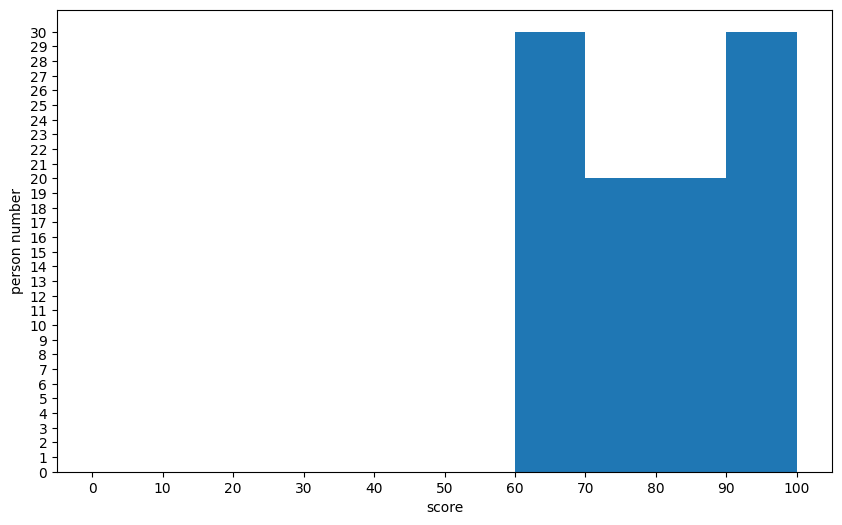

In [ ]:
# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(figsize=(10, 6))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(eng_scores, bins=10, range=(0, 100))
# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# 그래프 표시
plt.show()

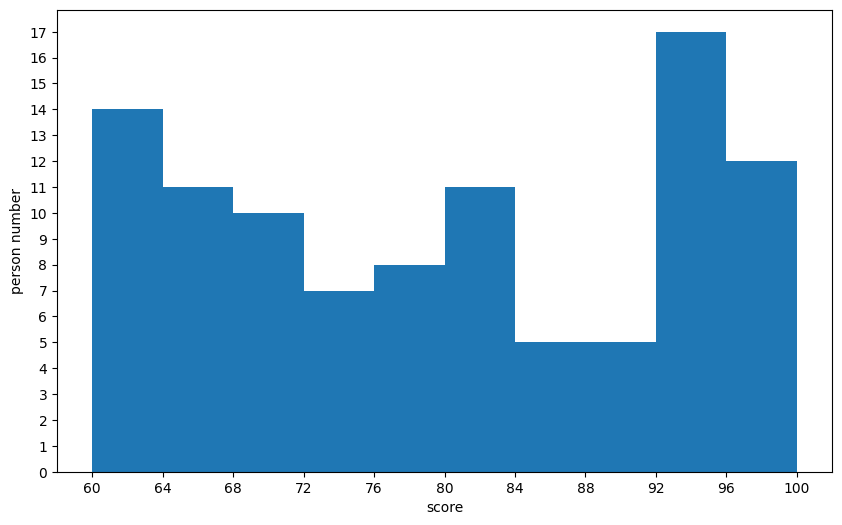

In [ ]:
# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(figsize=(10, 6))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(eng_scores, bins=10, range=(60, 100))
# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(60, 100, 10+1))
# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# 그래프 표시
plt.show()

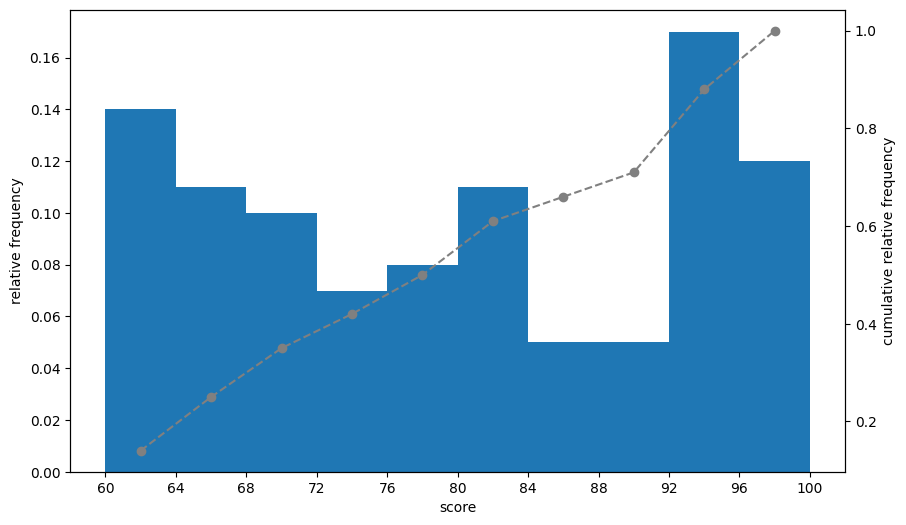

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(eng_scores) / len(eng_scores)
rel_freq, _, _ = ax1.hist(eng_scores, bins=10,
                          range=(60, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(60, 100, 4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그람
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(60, 100, 10+1))

plt.show()

다음과 같이 히스토그램과 누적 도수그래프를 같이 그리면 데이터가 어디에 많이 치중되어있는지, 분포는 어떻게 형성되어있는지에 대해서 알수 있습니다.

## 2.3 상자그림

상자그림은 아까 사분위수와 IQR을 다룰때 언급을 했었는데요. 상자는 Q1 - Q3까지를 나타내고, 수염은 Q1 - 1.5IQR Q3 + 1.5IQR을 나타냅니다. 여기에 들어가지 않은 값은 이상값으로 후처리를 하게 됩니다.

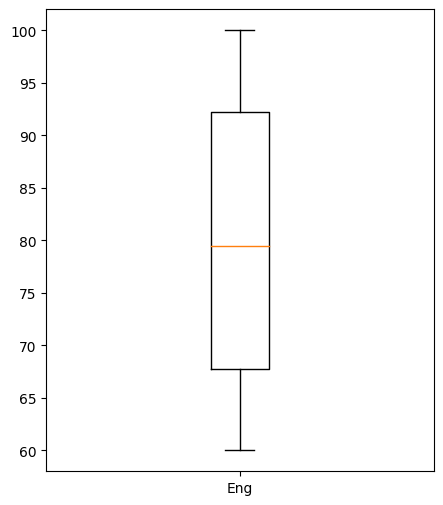

In [ ]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(eng_scores, labels=['Eng'])

plt.show()

# 따릉이 데이터로 실습해보기

In [49]:
import pandas as pd
df = pd.read_csv('train.csv')

In [50]:
df

# id : 날짜와 시간별 id
# hour_bef_temperature : 1시간 전 기온
# hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
# hour_bef_windspeed : 1시간 전 풍속(평균)
# hour_bef_humidity : 1시간 전 습도
# hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
# hour_bef_ozone : 1시간 전 오존
# hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
# hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
# count : 시간에 따른 따릉이 대여 수

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.30,1.00,1.50,89.00,576.00,0.03,76.00,33.00,49.00
1,6,13,20.10,0.00,1.40,48.00,916.00,0.04,73.00,40.00,159.00
2,7,6,13.90,0.00,0.70,79.00,1382.00,0.03,32.00,19.00,26.00
3,8,23,8.10,0.00,2.70,54.00,946.00,0.04,75.00,64.00,57.00
4,9,18,29.50,0.00,4.80,7.00,2000.00,0.06,27.00,11.00,431.00
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.80,0.00,1.60,53.00,2000.00,0.03,37.00,27.00,21.00
1455,2175,3,10.80,0.00,3.80,45.00,2000.00,0.04,34.00,19.00,20.00
1456,2176,5,18.30,0.00,1.90,54.00,2000.00,0.01,30.00,21.00,22.00
1457,2178,21,20.70,0.00,3.70,37.00,1395.00,0.08,71.00,36.00,216.00


In [51]:
df.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.30,1.00,1.50,89.00,576.00,0.03,76.00,33.00,49.00
1,6,13,20.10,0.00,1.40,48.00,916.00,0.04,73.00,40.00,159.00
2,7,6,13.90,0.00,0.70,79.00,1382.00,0.03,32.00,19.00,26.00
3,8,23,8.10,0.00,2.70,54.00,946.00,0.04,75.00,64.00,57.00
4,9,18,29.50,0.00,4.80,7.00,2000.00,0.06,27.00,11.00,431.00


In [56]:
df.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.80,0.00,1.60,53.00,2000.00,0.03,37.00,27.00,21.00
1455,2175,3,10.80,0.00,3.80,45.00,2000.00,0.04,34.00,19.00,20.00
1456,2176,5,18.30,0.00,1.90,54.00,2000.00,0.01,30.00,21.00,22.00
1457,2178,21,20.70,0.00,3.70,37.00,1395.00,0.08,71.00,36.00,216.00
1458,2179,17,21.10,0.00,3.10,47.00,1973.00,0.05,38.00,17.00,170.00


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [55]:
df.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.00,1459.00,1457.00,1457.00,1450.00,1457.00,1457.00,1383.00,1369.00,1342.00,1459.00
mean,1105.91,11.49,16.72,0.03,2.48,52.23,1405.22,0.04,57.17,30.33,108.56
std,631.34,6.92,5.24,0.17,1.38,20.37,583.13,0.02,31.77,14.71,82.63
min,3.00,0.00,3.10,0.00,0.00,7.00,78.00,0.00,9.00,8.00,1.00
25%,555.50,5.50,12.80,0.00,1.40,36.00,879.00,0.03,36.00,20.00,37.00
50%,1115.00,11.00,16.60,0.00,2.30,51.00,1577.00,0.04,51.00,26.00,96.00
75%,1651.00,17.50,20.10,0.00,3.40,69.00,1994.00,0.05,69.00,37.00,150.00
max,2179.00,23.00,30.00,1.00,8.00,99.00,2000.00,0.12,269.00,90.00,431.00


In [77]:
# 결측치 확인
df.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [78]:
# hour_bef_precipitation에서 결측치를 -1로 바꿔주고 float -> int형으로 바꾸기
df['hour_bef_precipitation'] = df['hour_bef_precipitation'].fillna(-1).astype('int8').replace({-1:None})
df

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.30,1,1.50,89.00,576.00,0.03,76.00,33.00,49.00
1,6,13,20.10,0,1.40,48.00,916.00,0.04,73.00,40.00,159.00
2,7,6,13.90,0,0.70,79.00,1382.00,0.03,32.00,19.00,26.00
3,8,23,8.10,0,2.70,54.00,946.00,0.04,75.00,64.00,57.00
4,9,18,29.50,0,4.80,7.00,2000.00,0.06,27.00,11.00,431.00
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.80,0,1.60,53.00,2000.00,0.03,37.00,27.00,21.00
1455,2175,3,10.80,0,3.80,45.00,2000.00,0.04,34.00,19.00,20.00
1456,2176,5,18.30,0,1.90,54.00,2000.00,0.01,30.00,21.00,22.00
1457,2178,21,20.70,0,3.70,37.00,1395.00,0.08,71.00,36.00,216.00


In [85]:
# 0 -> 비가 안온 시간대 1411,
# 1 -> 비가 온 시간대 46
df['hour_bef_precipitation'].value_counts()

0    1411
1      46
Name: hour_bef_precipitation, dtype: int64

In [84]:
rain_1 = df[df['hour_bef_precipitation'] == 1]
rain_1.describe()

,id,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,46.00,46.00,46.00,46.00,46.00,46.00,43.00,41.00,40.00,46.00
mean,908.63,12.33,13.90,2.65,83.41,704.13,0.03,47.90,30.73,33.67
std,623.37,6.93,2.73,1.67,14.64,583.95,0.02,23.75,11.99,40.69
min,3.00,0.00,9.50,0.00,42.00,106.00,0.00,9.00,8.00,1.00
25%,477.00,6.25,11.53,1.40,81.25,285.25,0.02,30.00,23.75,3.25
50%,862.50,14.50,13.30,2.75,88.50,437.50,0.03,41.00,28.50,19.50
75%,1268.00,17.00,15.98,3.48,92.00,1080.50,0.04,61.00,37.00,44.00
max,2161.00,23.00,19.90,8.00,99.00,2000.00,0.06,109.00,61.00,165.00


In [83]:
sunny_0 = df[df['hour_bef_precipitation'] == 0]
sunny_0.describe()

,id,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1411.00,1411.00,1411.00,1404.00,1411.00,1411.00,1340.00,1328.00,1302.00,1411.00
mean,1111.81,11.47,16.81,2.47,51.21,1428.07,0.04,57.45,30.31,111.13
std,631.06,6.92,5.28,1.37,19.72,568.94,0.02,31.95,14.79,82.50
min,6.00,0.00,3.10,0.00,7.00,78.00,0.00,12.00,8.00,1.00
25%,560.50,5.50,12.90,1.40,36.00,912.50,0.03,36.00,20.00,40.00
50%,1126.00,11.00,16.80,2.30,50.00,1600.00,0.04,51.50,26.00,99.00
75%,1656.00,18.00,20.20,3.40,67.00,1996.00,0.05,70.00,37.00,152.50
max,2179.00,23.00,30.00,7.70,99.00,2000.00,0.12,269.00,90.00,431.00


In [88]:
# 온도의 결측치 위치 확인하기
df[df['hour_bef_temperature'].isna()]

# 934행과 1035행의 온도가 결측값

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,39.00
1035,1553,18,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [86]:
# 시간대별 평균 온도 구하기
df.groupby('hour').mean()['hour_bef_temperature']

<ipython-input-86-cea2ddee3628>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('hour').mean()['hour_bef_temperature']


hour
0    14.79
1    14.16
2    13.75
3    13.36
4    13.00
5    12.67
6    12.38
7    12.19
8    12.60
9    14.32
10   16.24
11   18.02
12   19.46
13   20.65
14   21.23
15   21.74
16   22.02
17   21.60
18   20.93
19   19.70
20   18.19
21   16.98
22   16.06
23   15.42
Name: hour_bef_temperature, dtype: float64

In [91]:
# 온도의 결측값을 시간대에 맞게 평균값으로 채워주기
# 딕셔너리 형태로 934행에 14.79를 1035행에 20.93을 넣어주고 inplace = True 로 값을 저장해주기

df['hour_bef_temperature'].fillna({934:14.79, 1035:20.93}, inplace = True)

df.isna().sum()  # 온도의 결측값이 없어짐을 확인ㅇㅇ

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [110]:
# 시간을 기준으로 오름차순 정렬
df_sort = df.sort_values(by=df.columns[1],ascending = True)
df_w = df_sort[['hour','hour_bef_temperature','hour_bef_precipitation','count']]
df_w.tail()

,hour,hour_bef_temperature,hour_bef_precipitation,count
1146,23,19.50,0,134.00
820,23,10.00,0,73.00
1160,23,20.40,0,124.00
1369,23,13.10,0,98.00
1036,23,9.50,0,58.00
